In [1]:
import os
import math
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
from tqdm import notebook as tqdm

from scipy.cluster.hierarchy import dendrogram

%matplotlib widget

### 6a. Set better rcParams to aid in visualizations

In [2]:
#Pretty Plots  -  https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
rcParams['font.size'] = 4
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['xtick.major.size'] = 2
rcParams['xtick.minor.size'] = 1
rcParams['ytick.major.size'] = 2
rcParams['ytick.minor.size'] = 1
rcParams['xtick.labelsize'] = 4
rcParams['ytick.labelsize'] = 4
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['xtick.major.top'] = True
rcParams['xtick.minor.top'] = True
rcParams['ytick.right'] = True
rcParams['ytick.major.right'] = True
rcParams['ytick.minor.right'] = True
rcParams['figure.figsize'] = (2, 2)
rcParams['figure.dpi'] = 300
rcParams['image.aspect'] = 'equal'

rcParams['lines.linewidth'] = 0.5
rcParams['lines.markersize'] = 1

rcParams['axes.labelsize'] = 6
rcParams['legend.fontsize'] = 3
rcParams['figure.autolayout'] = True

colors = ['#C94A47', '#214172', '#E09027', '#656665', '#808758', '#0068AB', '#FBD8D9', \
                  '#FFDA5D', '#B5D3E7', '#E3EFD0', '#CC7163', '#823F61']

from cycler import cycler
rcParams['axes.prop_cycle'] = cycler(color = ['#C94A47', '#214172', '#E09027', '#656665', '#808758', '#0068AB', '#FBD8D9', \
                  '#FFDA5D', '#B5D3E7', '#E3EFD0', '#CC7163', '#823F61'])

### 6b. Open the results dataframe

In [3]:
results_df_path = 'ac_results_df.pkl'
open_file = open(results_df_path, 'rb')
results_df = pickle.load(open_file)
open_file.close()

### 6c. Use the saved data to construct a descriptive name for plotting labels

In [4]:
def name_creator(row):
    """
    Function used for creating a descriptive name from the feature
    and multiplier columns. 
    Intended to be used with the pd.DataFrame.apply() method
    
    Parameters
    ----------
    row : pd.Dataframe row
        The row corresponding to a single agglomerative clustering output
        
    Returns
    -------
    name : str
        A descriptive name for the agglomerative clustering output
    """     
    if row['multiplier1']>0:
        name = '{}x{} - {}x{}'.format(row['feature0'], row['multiplier0'], row['feature1'], row['multiplier1'])
    else:
        name = '{}x{}'.format(row['feature0'], row['multiplier0'])
    return name

In [5]:
results_df['conventional_name'] = results_df.apply(name_creator, axis=1)

In [6]:
results_df.head()

,feature0,multiplier0,feature1,multiplier1,conductivity_variance,bvse_variance,cluster_sets,ddata,linkage_matrix,conventional_name
0,ape_features_mode-structure_CAMN,1,NaN,NaN,"[2185.983729796786, 2148.6226659824033, 2148.6...","[52634.77398885612, 52288.47928676296, 52288.4...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{'icoord': [[5.0, 5.0, 15.0, 15.0], [35.0, 35....","[[0.0, 4.0, 0.0, 2.0], [1.0, 3.0, 0.0, 2.0], [...",ape_features_mode-structure_CAMNx1
1,rdf_features_cutoff-10_binsize-0.1_mode-struct...,1,xrd_features_pattern_length-451_mode-structure...,2,"[2185.983729796786, 2185.983729796786, 2185.98...","[52634.77398885612, 52634.77385616511, 52634.7...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{'icoord': [[5.0, 5.0, 15.0, 15.0], [45.0, 45....","[[18771.0, 20718.0, 0.0, 2.0], [20837.0, 23805...",rdf_features_cutoff-10_binsize-0.1_mode-struct...
2,ape_features_mode-structure_CAMN,1,density_features_mode-structure_CAMN,3,"[2185.983729796786, 2185.983729796786, 2185.98...","[52634.77398885612, 52634.77398885612, 52634.7...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{'icoord': [[5.0, 5.0, 15.0, 15.0], [25.0, 25....","[[17788.0, 20343.0, 0.0, 2.0], [22597.0, 23809...",ape_features_mode-structure_CAMNx1 - density_f...
3,xrd_features_pattern_length-451_mode-structure...,1,os_features_mode-structure_CAMN,2,"[2185.983729796786, 2185.983729796786, 2176.13...","[52634.77398885612, 52634.77398885612, 52324.9...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{'icoord': [[5.0, 5.0, 15.0, 15.0], [45.0, 45....","[[23381.0, 24462.0, 0.0, 2.0], [22912.0, 23575...",xrd_features_pattern_length-451_mode-structure...
4,ape_features_mode-structure_CAMN,1,density_features_mode-structure_CAMN,3,"[2185.983729796786, 2185.983729796786, 2185.98...","[52634.77398885612, 52634.77398885612, 52634.7...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{'icoord': [[5.0, 5.0, 15.0, 15.0], [25.0, 25....","[[17788.0, 20343.0, 0.0, 2.0], [22597.0, 23809...",ape_features_mode-structure_CAMNx1 - density_f...


### 6d. Create a plotter to compare the intracluster variance calculations

In [7]:
def plot_variance(results_df, rows_to_plot, plot_type):
    """
    Function used for plotting either the conductivity or BVSE variance
    vs. depth of clustering, for each agglomerative clustering output.
    
    Parameters
    ----------
    results_df : pd.Dataframe
        Dataframe where the agglomerative clustering results are stored. Rows correspond
        to each agglomerative clustering run. 
    
    rows_to_plot : list
        A list of the rows that should be plotted together.
        
    plot_type : str
        Either 'conductivity_variance' or 'bvse_variance' to denote
        which dataset is plotted. 
        
    Raises
    ------
    ValueError
        If an incorrect plot_type string is passed.  
    """     
    if plot_type == 'conductivity_variance':
        plt.close(1)
        plt.figure(1, figsize=(4,4))
    elif plot_type == 'bvse_variance':
        plt.close(2)
        plt.figure(2, figsize=(4,4))
    else:
        raise ValueError("Not a valid plot_type value. Either use 'conductivity_variance' or 'bvse_variance'.")
        
    y_data_list = results_df.loc[rows_to_plot, plot_type]
    label_name = results_df.loc[rows_to_plot, 'conventional_name']
    for y_data, label in zip(y_data_list, label_name):
        x_data = range(len(y_data))
        plt.scatter(x_data, y_data, marker='.', s=6, c=None, alpha=1, label=label)
    plt.legend(loc="upper right")
    if plot_type == 'conductivity_variance':
        plt.title("Conductivity variance vs. clusters")
        plt.ylabel('Conductivity variance', rotation=90)
    elif plot_type == 'bvse_variance':
        plt.title("BVSE variance vs. clusters")
        plt.ylabel('BVSE variance', rotation=90)
    plt.show()

### 6e. Plotting conductivity variance

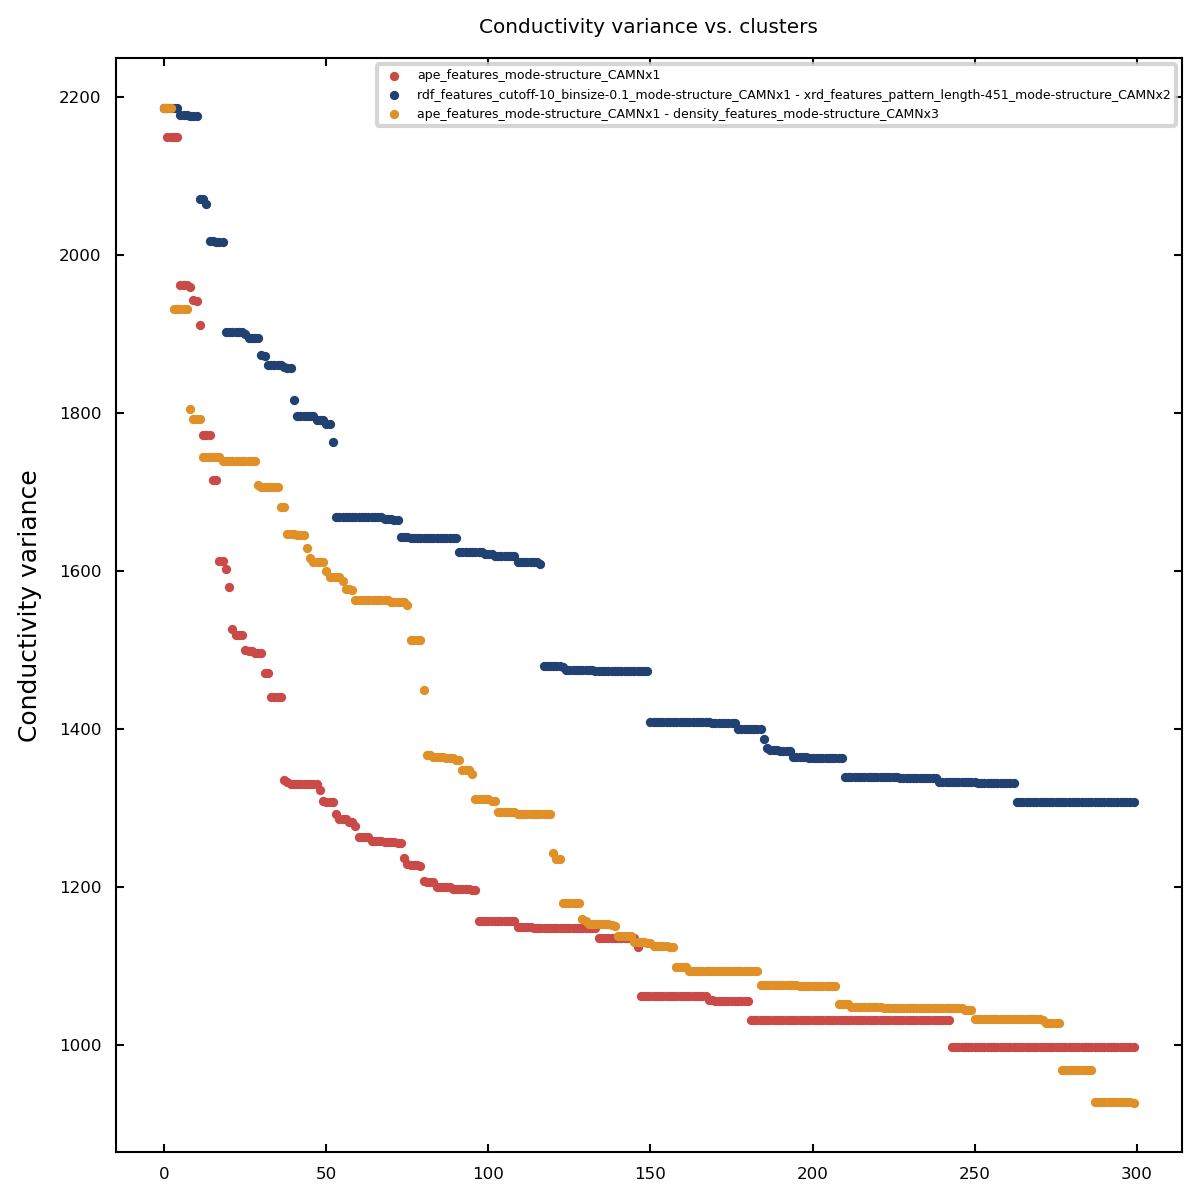

In [8]:
plot_variance(results_df, rows_to_plot=[0,1,2], plot_type='conductivity_variance')

### 6f. Plotting bvse variance

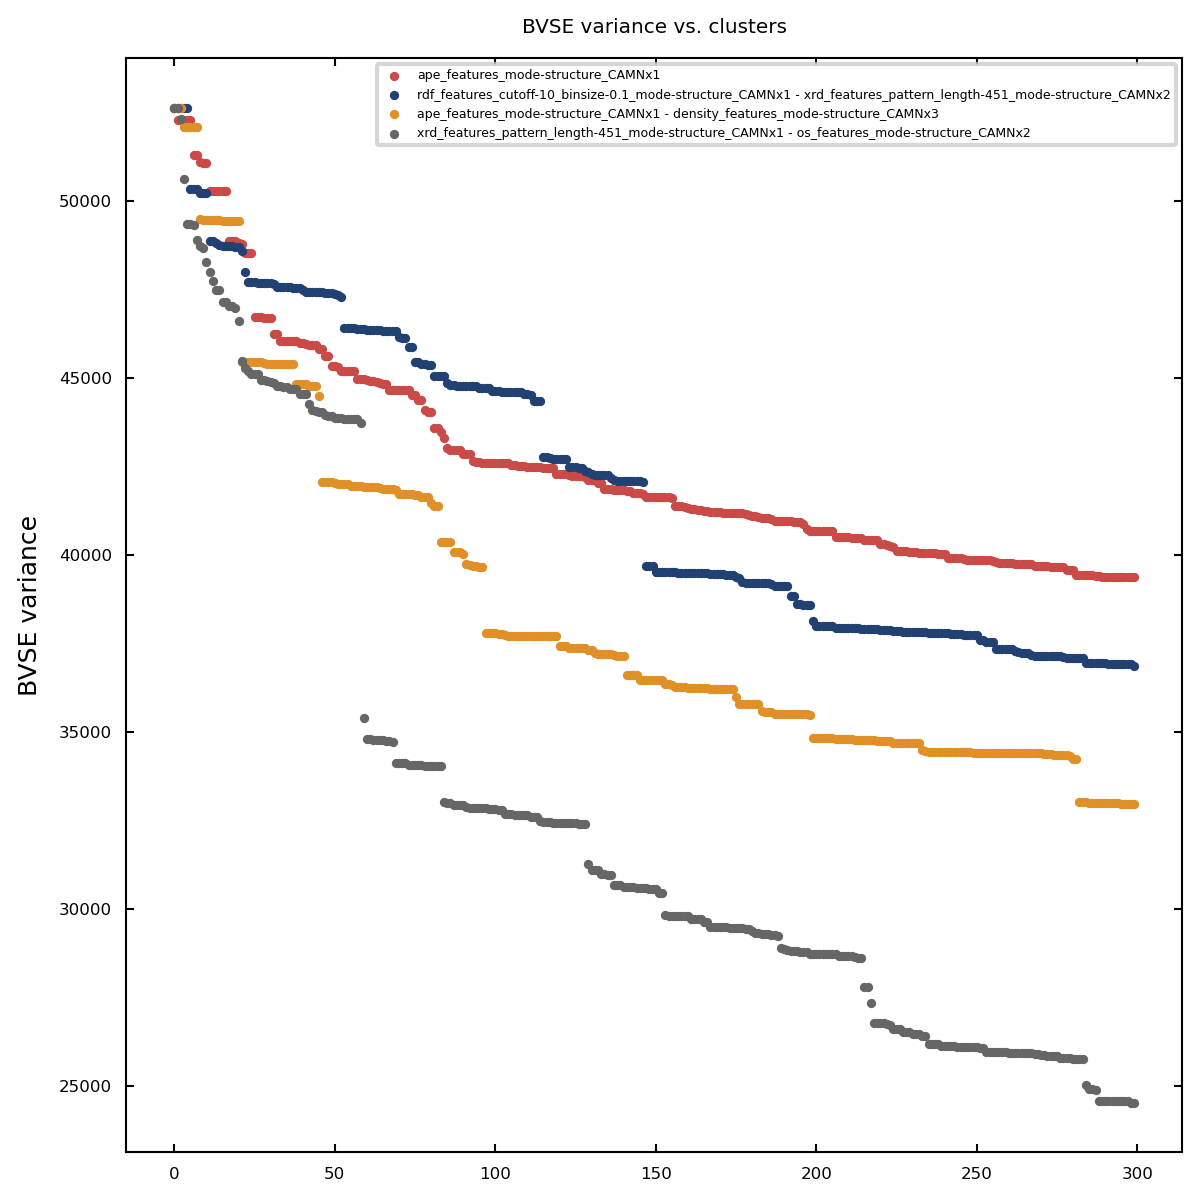

In [9]:
plot_variance(results_df, rows_to_plot=[0,1,2,3], plot_type='bvse_variance')

### 6g. Plotting the agglomerative dendrogram

In [10]:
def augmented_dendrogram(row, results_df, max_d=5, annotate_above=5):
    """
    Function used for plotting agglomerative dendrogram for a single
    agglomerative clustering run.
    
    Parameters
    ----------
    row : int
        The index of the row for the agglomerative clustering run. 
    
    results_df : pd.Dataframe
        Dataframe where the agglomerative clustering results are stored. Rows correspond
        to each agglomerative clustering run. 
    
    max_d : int
        The euclidean variance depth where a cutoff threshold should be drawn. All branches
        below this line will be given different colors.
        
    annotate_above : str
        The euclidean variance depth where annotations should be applied. Anything above this 
        depth will be annotated. 
    """     
    linkage_matrix = results_df.loc[row, 'linkage_matrix']
    max_clustering = len(results_df.loc[row, 'cluster_sets'])
    
    plt.close(3)
    plt.figure(3, figsize=(5,5))
    
    ddata = dendrogram(linkage_matrix, 
        truncate_mode='lastp',
        p=max_clustering+1,
        leaf_rotation=90.,
        leaf_font_size=3.,
        show_contracted=False,
        color_threshold=max_d, #where this is the distance cutoff
        above_threshold_color='grey',
        no_plot = False)
    
    plt.title('Hierarchical Clustering Dendrogram (truncated) - {}'.format(results_df.loc[row, 'conventional_name']))
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
    if max_d:
        plt.axhline(y=max_d, c='k')

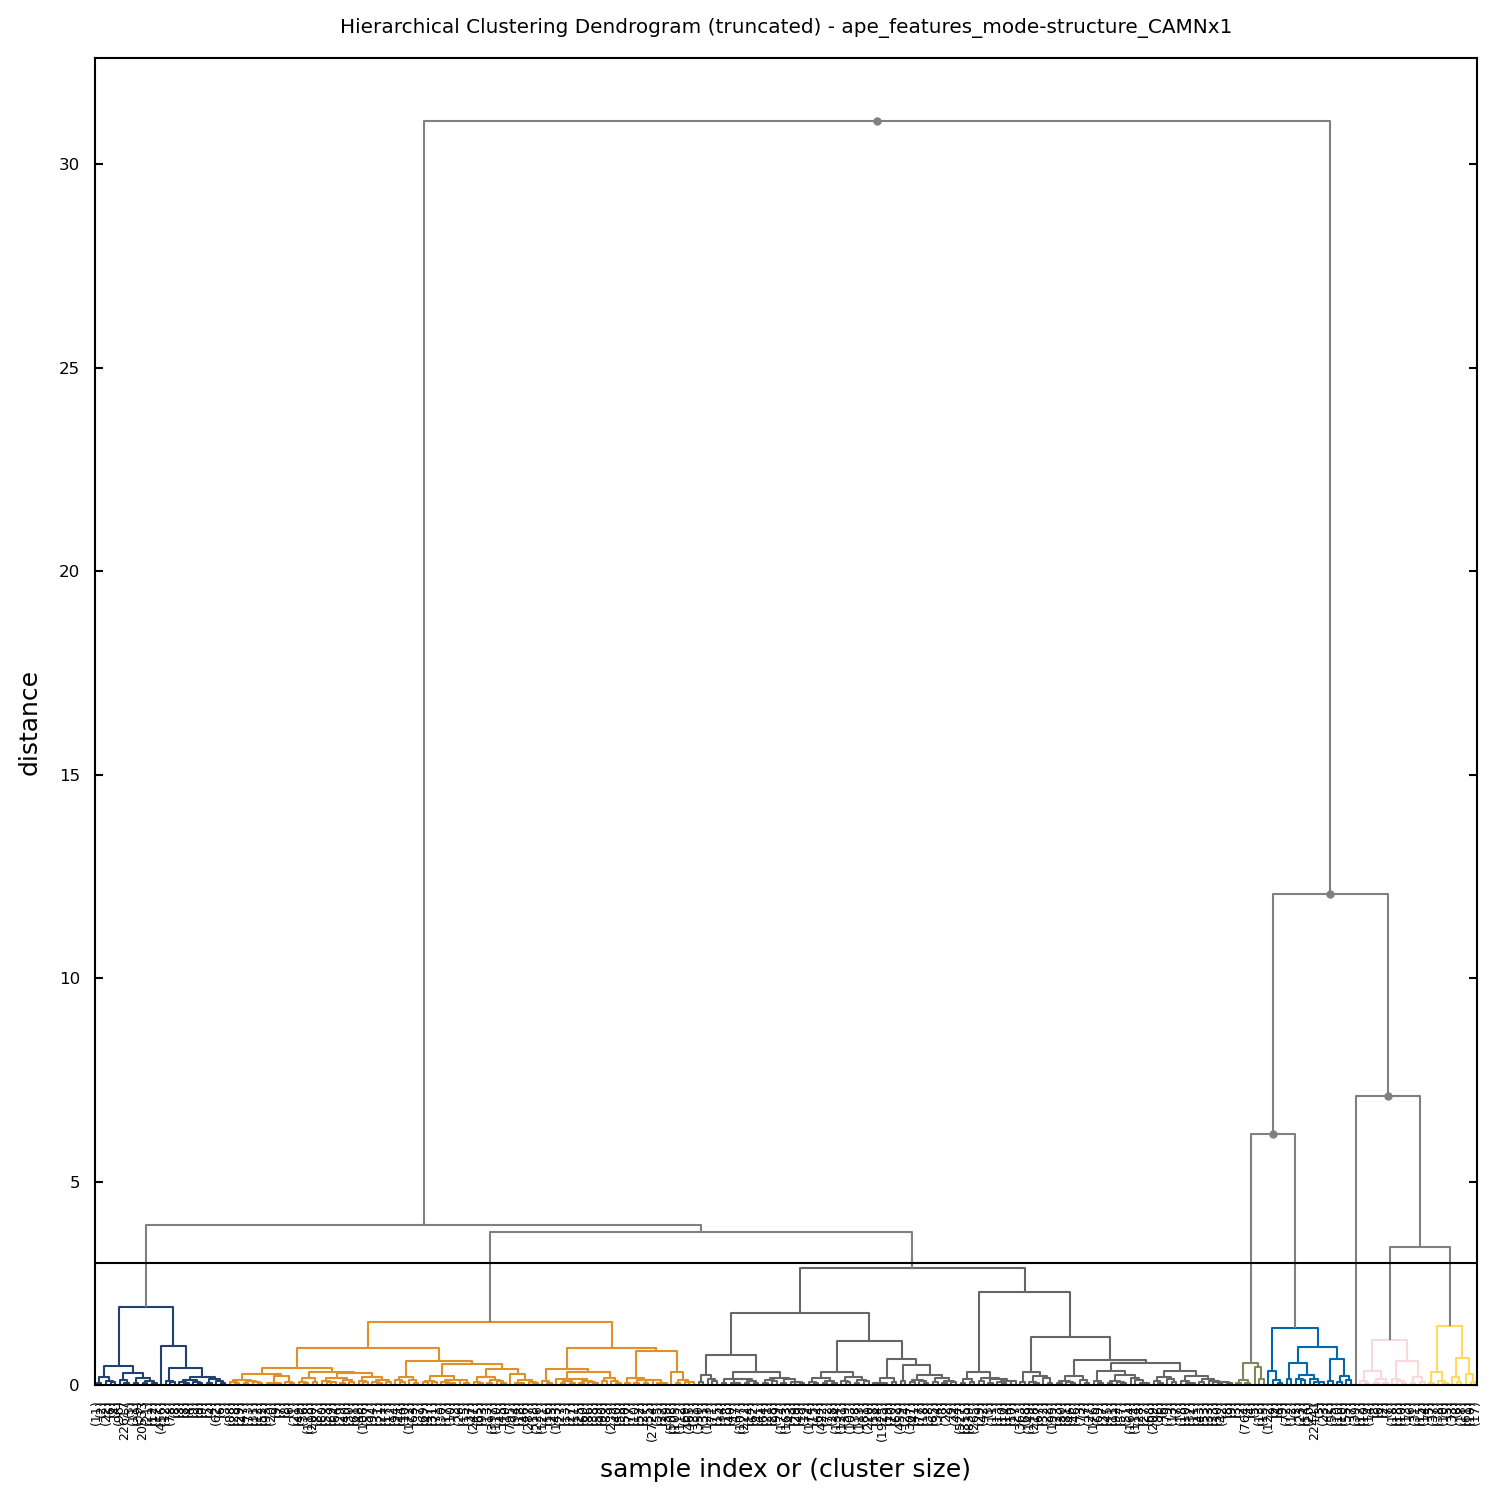

In [11]:
augmented_dendrogram(row=0, results_df=results_df, max_d=3, annotate_above=5)

### 6h. Calculate running averages for sets of 50 clustering depths 

In [12]:
def analyze_averages(row):
    """
    Function used to create average conductivity and bvse variances across 
    sets of 50 clustering depths. The function is intended to be run with the
    pandas.DataFrame.apply() method. 
    
    Parameters
    ----------
    row : dataframe row
        An entire row of the pandas dataframe 
    """     
    start_idx = [0, 50, 100, 150, 200, 250]
    stop_idx = [50, 100, 150, 200, 250, 300]
    averages = []
    for start, stop in zip(start_idx, stop_idx):
        averages.append(np.mean(row['conductivity_variance'][start:stop]))
        
    for start, stop in zip(start_idx, stop_idx):
        averages.append(np.mean(row['bvse_variance'][start:stop]))
    
    return averages

In [13]:
applied_df = results_df.apply(analyze_averages, axis=1, result_type='expand').rename(columns={0:'cv_avg0-50', 1:'cv_avg50-100', 2:'cv_avg100-150', \
                                                                                              3:'cv_avg150-200', 4:'cv_avg200-250', 5:'cv_avg250-300', \
                                                                                              6:'bv_avg0-50', 7:'bv_avg50-100', 8:'bv_avg100-150', \
                                                                                              9:'bv_avg150-200', 10:'bv_avg200-250', 11:'bv_avg250-300'})
results_df = pd.concat([results_df, applied_df], axis='columns')


In [14]:
results_df

,feature0,multiplier0,feature1,multiplier1,conductivity_variance,bvse_variance,cluster_sets,ddata,linkage_matrix,conventional_name,...,cv_avg100-150,cv_avg150-200,cv_avg200-250,cv_avg250-300,bv_avg0-50,bv_avg50-100,bv_avg100-150,bv_avg150-200,bv_avg200-250,bv_avg250-300
0,ape_features_mode-structure_CAMN,1,NaN,NaN,"[2185.983729796786, 2148.6226659824033, 2148.6...","[52634.77398885612, 52288.47928676296, 52288.4...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{'icoord': [[5.0, 5.0, 15.0, 15.0], [35.0, 35....","[[0.0, 4.0, 0.0, 2.0], [1.0, 3.0, 0.0, 2.0], [...",ape_features_mode-structure_CAMNx1,...,1140.646190,1048.205019,1025.981703,997.330395,48288.248380,44083.977838,42189.448887,41176.943354,40250.220990,39609.730258
1,rdf_features_cutoff-10_binsize-0.1_mode-struct...,1,xrd_features_pattern_length-451_mode-structure...,2,"[2185.983729796786, 2185.983729796786, 2185.98...","[52634.77398885612, 52634.77385616511, 52634.7...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{'icoord': [[5.0, 5.0, 15.0, 15.0], [45.0, 45....","[[18771.0, 20718.0, 0.0, 2.0], [20837.0, 23805...",rdf_features_cutoff-10_binsize-0.1_mode-struct...,...,1522.385922,1395.288250,1341.993383,1313.980520,48662.860767,45693.323391,42859.663034,39254.307144,37871.756289,37163.786461
2,ape_features_mode-structure_CAMN,1,density_features_mode-structure_CAMN,3,"[2185.983729796786, 2185.983729796786, 2185.98...","[52634.77398885612, 52634.77398885612, 52634.7...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{'icoord': [[5.0, 5.0, 15.0, 15.0], [25.0, 25....","[[17788.0, 20343.0, 0.0, 2.0], [22597.0, 23809...",ape_features_mode-structure_CAMNx1 - density_f...,...,1214.303362,1093.120879,1051.525521,991.873668,47196.066965,41068.125528,37335.957640,35944.296627,34660.440250,33885.411539
3,xrd_features_pattern_length-451_mode-structure...,1,os_features_mode-structure_CAMN,2,"[2185.983729796786, 2185.983729796786, 2176.13...","[52634.77398885612, 52634.77398885612, 52324.9...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{'icoord': [[5.0, 5.0, 15.0, 15.0], [45.0, 45....","[[23381.0, 24462.0, 0.0, 2.0], [22912.0, 23575...",xrd_features_pattern_length-451_mode-structure...,...,968.572904,957.259215,903.135497,819.521676,46371.408777,35615.057266,31819.727235,29448.213957,27161.780151,25515.546941
4,ape_features_mode-structure_CAMN,1,density_features_mode-structure_CAMN,3,"[2185.983729796786, 2185.983729796786, 2185.98...","[52634.77398885612, 52634.77398885612, 52634.7...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{'icoord': [[5.0, 5.0, 15.0, 15.0], [25.0, 25....","[[17788.0, 20343.0, 0.0, 2.0], [22597.0, 23809...",ape_features_mode-structure_CAMNx1 - density_f...,...,1214.303362,1093.120879,1051.525521,991.873668,47196.066965,41068.125528,37335.957640,35944.296627,34660.440250,33885.411539
5,xrd_features_pattern_length-451_mode-structure...,1,os_features_mode-structure_CAMN,2,"[2185.983729796786, 2185.983729796786, 2176.13...","[52634.77398885612, 52634.77398885612, 52324.9...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{'icoord': [[5.0, 5.0, 15.0, 15.0], [45.0, 45....","[[23381.0, 24462.0, 0.0, 2.0], [22912.0, 23575...",xrd_features_pattern_length-451_mode-structure...,...,968.572904,957.259215,903.135497,819.521676,46371.408777,35615.057266,31819.727235,29448.213957,27161.780151,25515.546941
6,ape_features_mode-structure_CAMN,1,density_features_mode-structure_CAMN,3,"[2185.983729796786, 2185.983729796786, 2185.98...","[52634.77398885612, 52634.77398885612, 52634.7...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{'icoord': [[5.0, 5.0, 15.0, 15.0], [25.0, 25....","[[17788.0, 20343.0, 0.0, 2.0], [22597.0, 23809...",ape_features_mode-structure_CAMNx1 - density_f...,...,1214.303362,1093.120879,1051.525521,991.873668,47196.066965,41068.125528,37335.957640,35944.296627,34660.440250,33885.411539
7,xrd_features_pattern_length-451_mode-structure...,1,os_features_mode-structure_CAMN,2,"[2185.983729796786, 2185.9837297

### 6i. Plot the averages

In [15]:
def plot_averages(rows_to_plot, average_type):
    """
    Function for comparing the averaged conductivity variance or
    the average BVSE variance values between agglomerative clustering
    runs. 
    
    Parameters
    ----------
    row_to_plot : list
        The index of the rows in the dataframe that should be plot.  
        
    average_type : str
        Either 'conductivity' or 'bvse' to denote which average is being plot. 
        
    Raises
    ------
    ValueError
        If an incorrect average_type string is passed.  
    """ 
    if average_type == 'conductivity':
        plt.close(4)
        plt.figure(4, figsize=(4,4))
    elif average_type == 'bvse':
        plt.close(5)
        plt.figure(5, figsize=(4,4))
    else:
        raise ValueError("Not a valid average_type value. Either use 'conductivity' or 'bvse'.")
    
    plt.close(3)
    plt.figure(3, figsize=(4,4))
    
    if average_type == 'conductivity':
        columns = ['cv_avg0-50', 'cv_avg50-100', 'cv_avg100-150', 'cv_avg150-200', 'cv_avg200-250', 'cv_avg250-300']
    elif average_type == 'bvse':
        columns = ['bv_avg0-50', 'bv_avg50-100', 'bv_avg100-150', 'bv_avg150-200', 'bv_avg200-250', 'bv_avg250-300']
    else:
        raise Exception("Not a valid average type")
    
    y_data_list = results_df.loc[rows_to_plot, columns].to_numpy()
    label_name = results_df.loc[rows_to_plot, 'conventional_name']
    for y_data, label in zip(y_data_list, label_name):
        x_data = columns
        plt.scatter(x_data, y_data, marker='.', s=6, c=None, alpha=1, label=label)
    plt.legend(loc="upper right")
    if average_type == 'conductivity':
        plt.title("Conductivity averages")
        plt.ylabel('Conductivity variance', rotation=90)
    elif average_type == 'bvse':
        plt.title("BVSE averages")
        plt.ylabel('BVSE variance', rotation=90)
    plt.show()

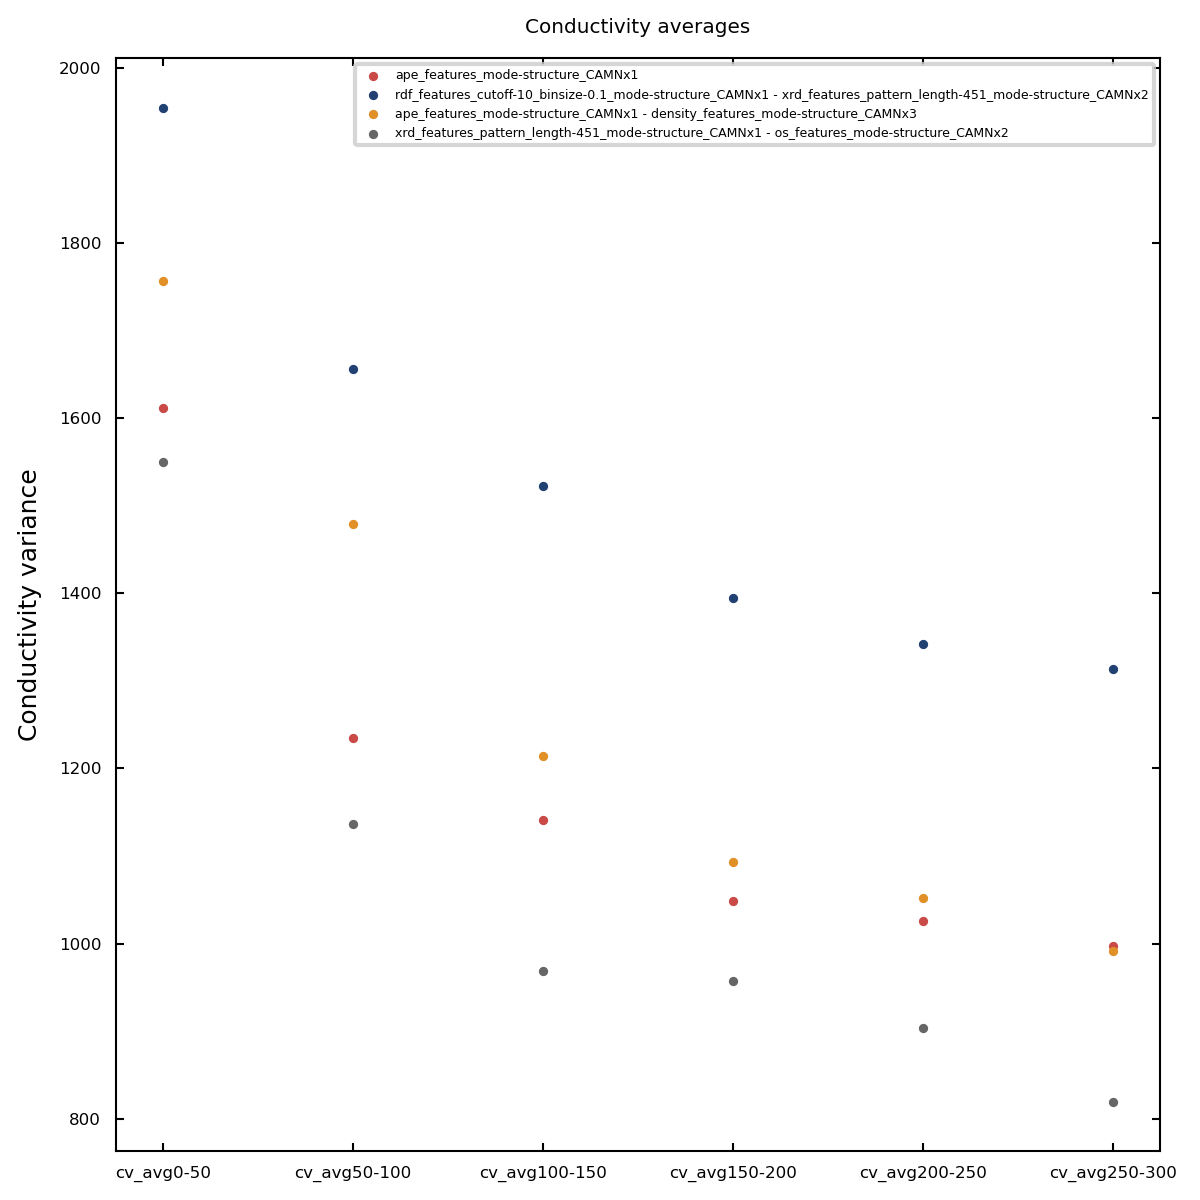

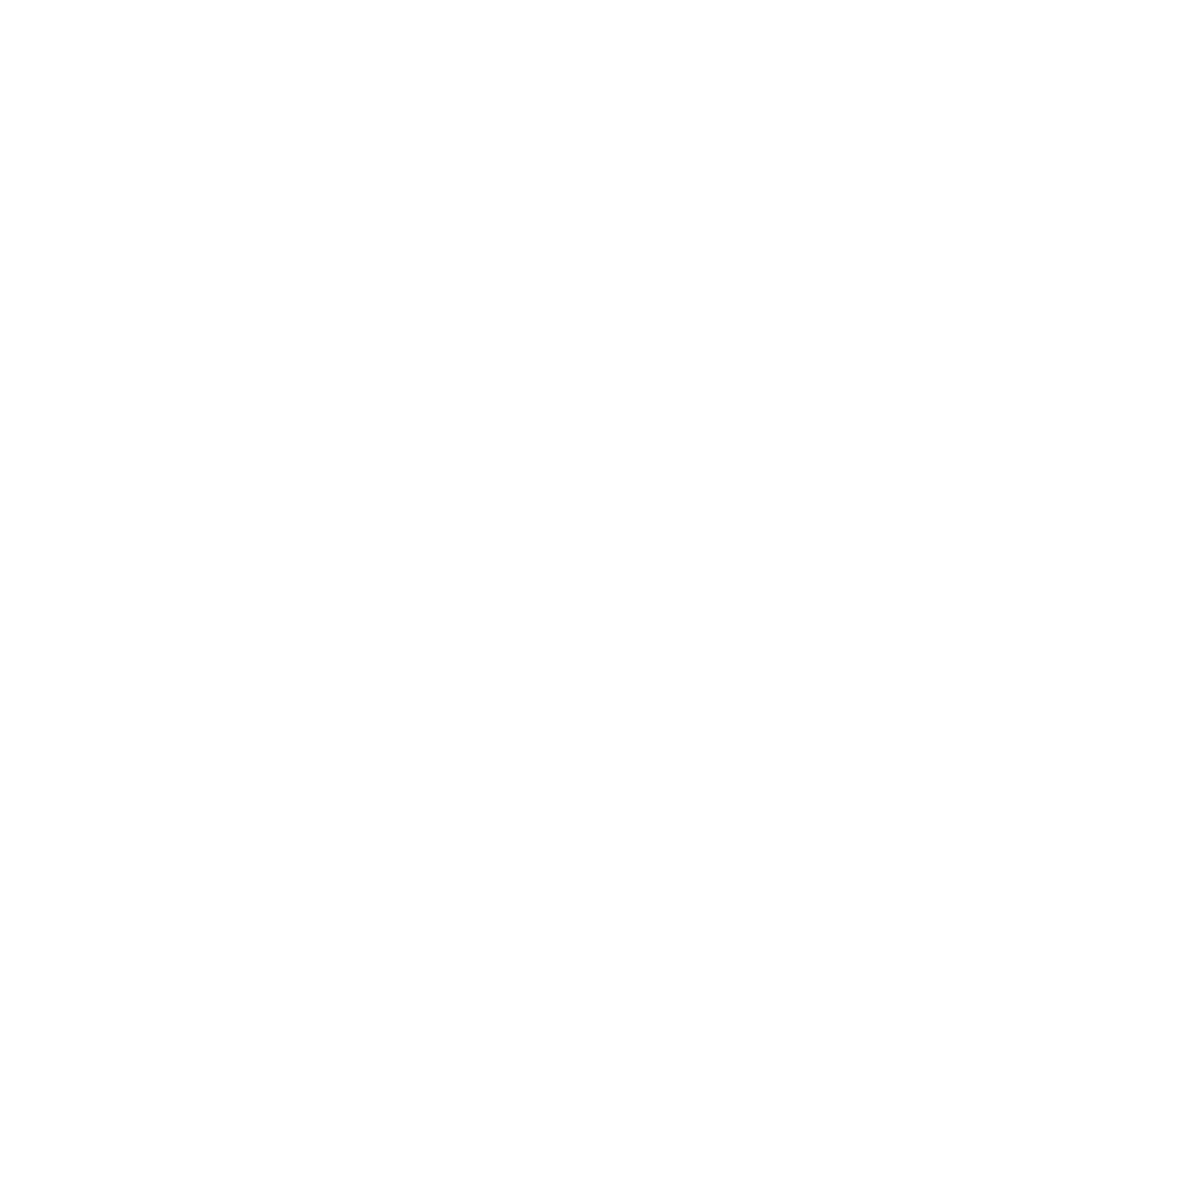

In [16]:
plot_averages([0,1,2,3], 'conductivity')

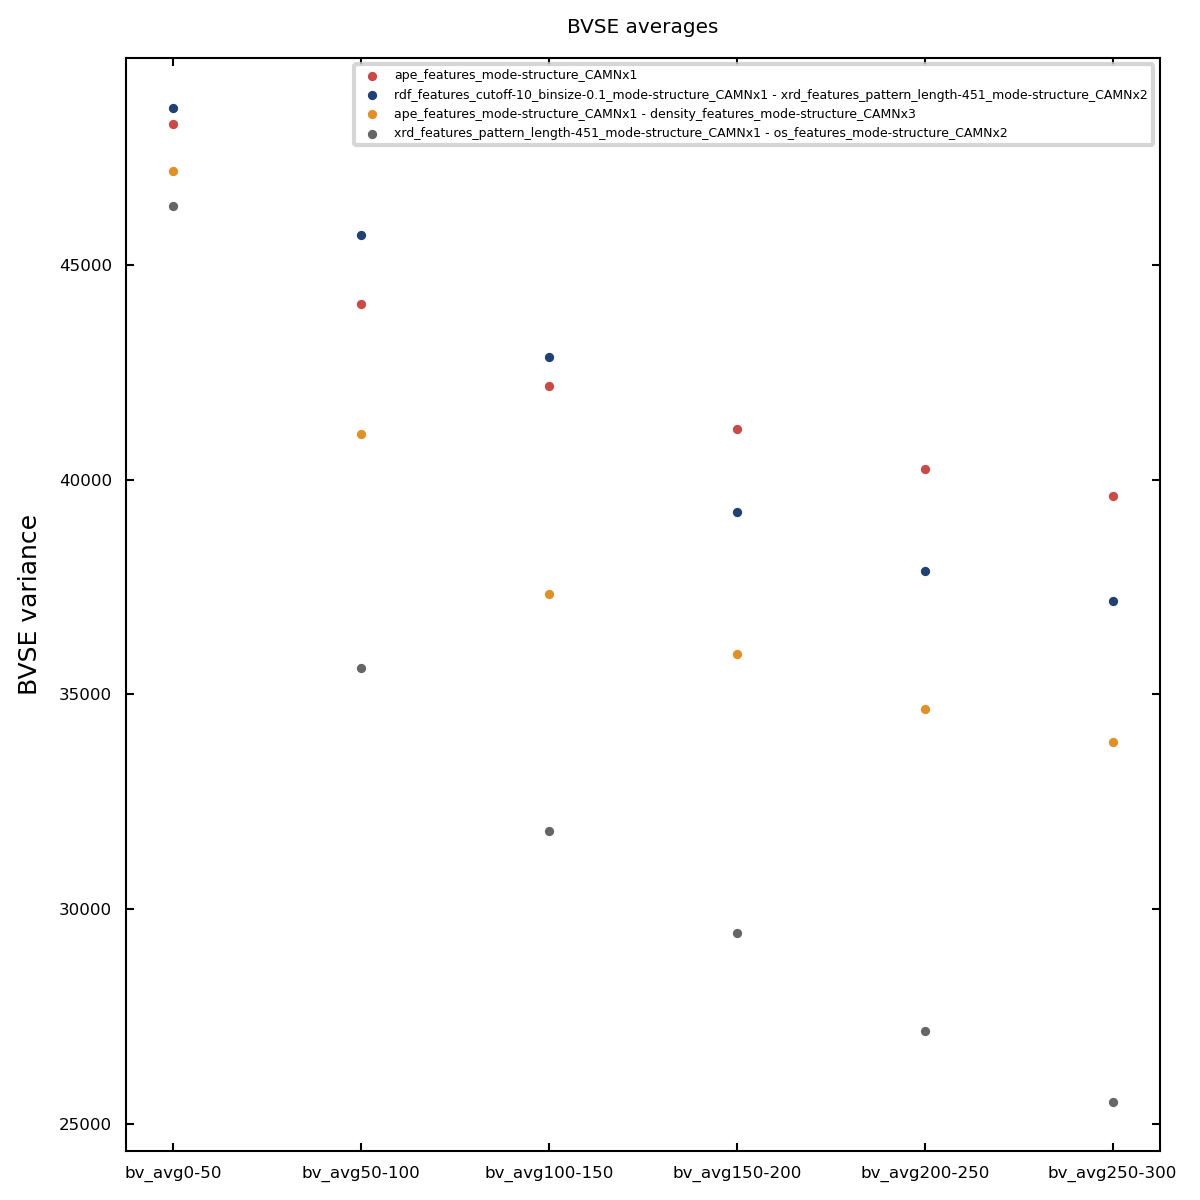

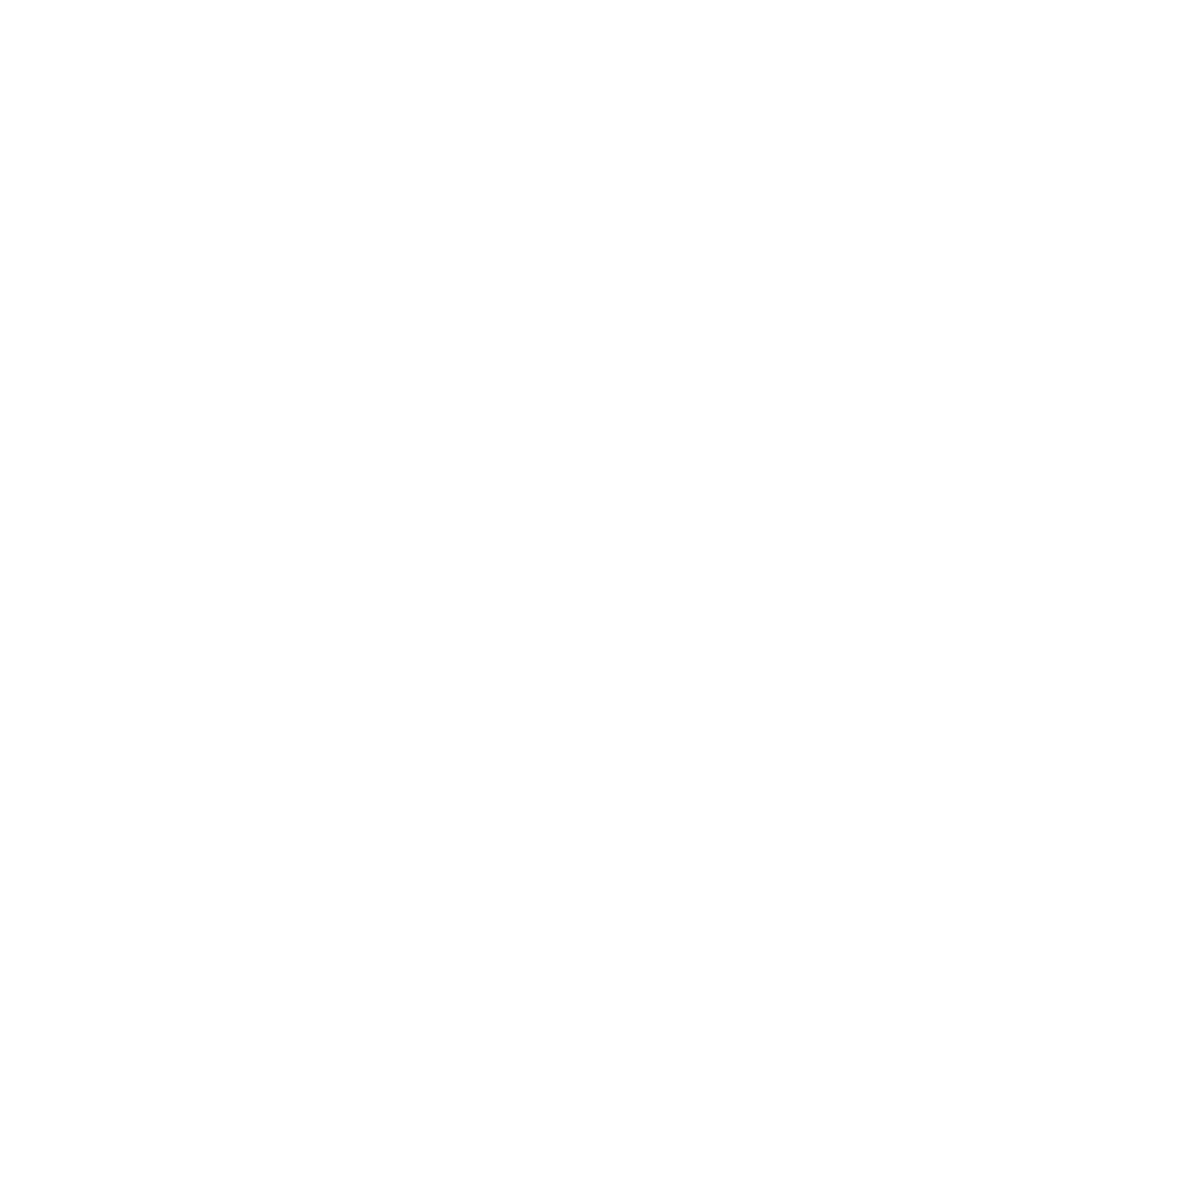

In [17]:
plot_averages([0,1,2,3], 'bvse')